Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 08: Template Matching and Pattern Recognition

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, January 13, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Exercise 0: Math recap (Covariance) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What does *covariance* express?

YOUR ANSWER HERE

**b)** Provide a formula to compute the covariance of two 1-dimensional datasets. How can it be generalized to the $n$-dimensional case?

YOUR ANSWER HERE

**c)** Create and plot two (1-dimensional) datasets with low covariance (use `plt.scatter`). Then do the same for two datasets with high covariance.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE

## Exercise 1: Template Matching [4 points]

**a)** Explain in your own words the idea of *template matching*. Is it a data or model based approach? What are the advantages and disadvantages? In what situations would you apply template matching?

YOUR ANSWER HERE

**b)** Explain the ideas of *mean absolute difference* and *correlation coefficient*? Name pros and cons.

YOUR ANSWER HERE

## Exercise 2: Where is Waldo [6 points]

In the two images `wheresWaldo1.jpg` and `wheresWaldo2.jpg`, Waldo is hiding in the midst of a busy crowd. He always wears the same red and white striped sweater and hat. However, he may be carrying a something that varies from scene to scene. Use template matching with the given Waldo templates (`waldo*.jpg`) to locate Waldo. Highlight
Waldo in the scene and indicate which template was matched.

**Hints:**
* You may use buildin functions to solve this exercise.
* The images are quite large! You may start by testing your code on a small image patch before applying it to the full scene.
* You may not achieve a perfect match. Analyse the problems you encounter and think how you can improve your result.

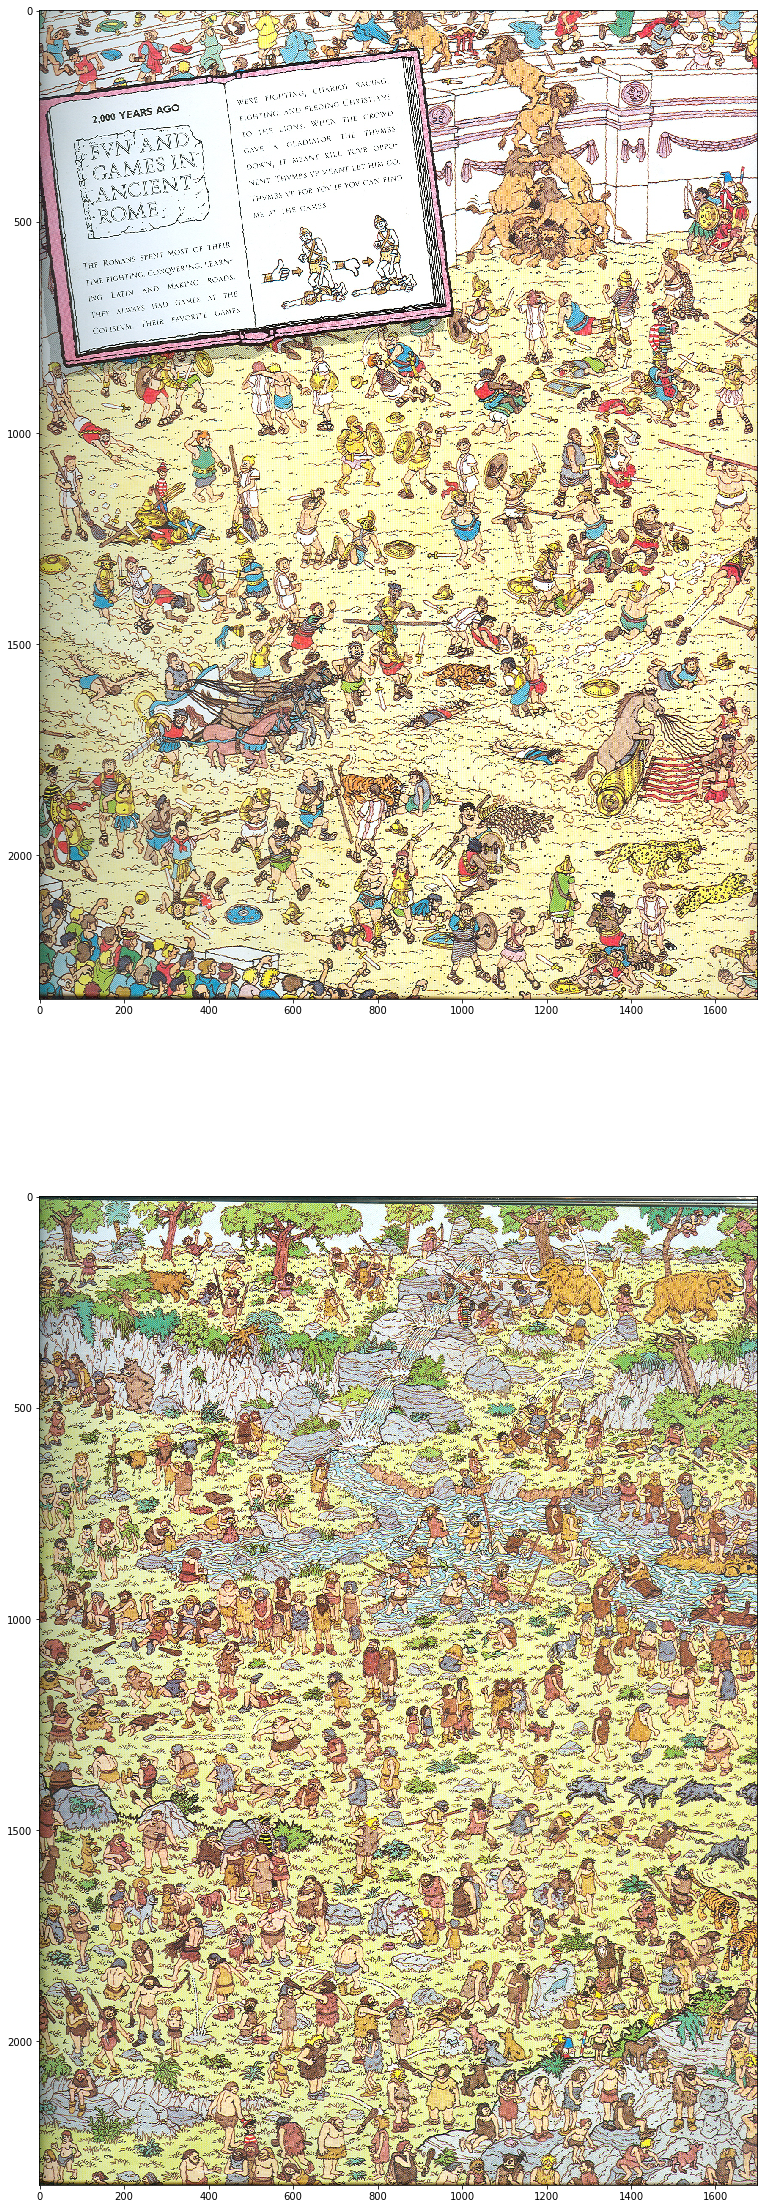

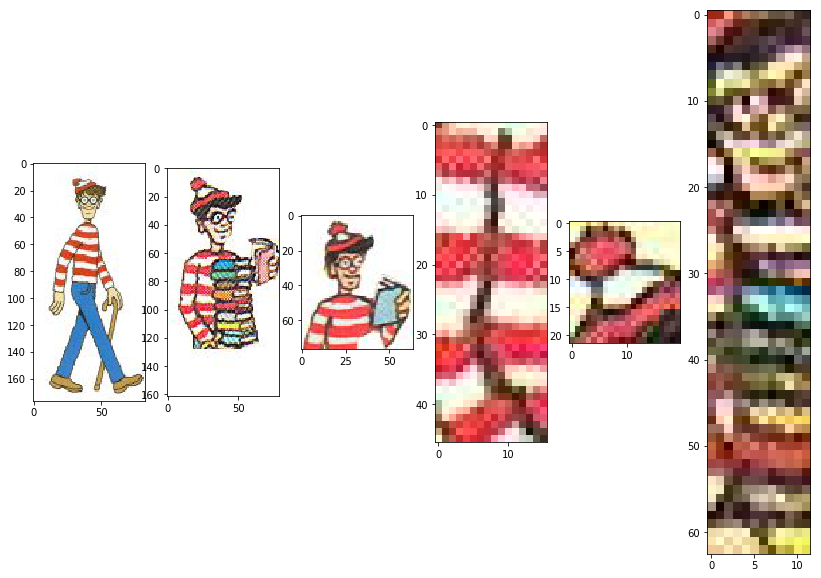

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 

waldos = [plt.imread('images/waldo/wheresWaldo{}.jpg'.format(i)) for i in range(1, 3)]
templates = [plt.imread('images/waldo/waldo{}.jpg'.format(i)) for i in range(0, 6)]

plt.figure(figsize = (14, 40))
for i,img in enumerate(waldos):
    plt.subplot(len(waldos),1,i+1)
    plt.imshow(img)
    
plt.figure(figsize = (14, 10))
for i,img in enumerate(templates):
    plt.subplot(1,len(templates),i+1)
    plt.imshow(img)
    
    
# YOUR CODE HERE

In [4]:
# YOUR CODE HERE

## Exercise 3: Pattern Recognition and PCA [4 points]

**a)** What are the goals of *pattern recognition*? How can they be achieved? What are the problems?

YOUR ANSWER HERE

**b)** What is *principal component analysis*? How is it related to pattern recognition?

YOUR ANSWER HERE

**c)** Explain how principal components can be computed? Then implement a function that performs the computation.

YOUR ANSWER HERE

In [5]:
# YOUR CODE HERE

def principal_comp(vec_x):
    covar = np.cov(vec_x)
    eigenval, eigenvec = np.linalg.eig(covar)
    print(covar)
#     idx = eigenval.argsort()[::-1]   
#     eigenval = eigenval[idx]
#     eigenvec = eigenvec[:,idx]
    return eigenval, eigenvec
    
a = np.array([[1, 2, 3],[4,5,6]])
print(principal_comp(a))

[[1. 1.]
 [1. 1.]]
(array([2., 0.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


## Exercise 4: Eigenfaces [6 points]

**a)** Import the images from the directory `images/trainimgs` into an numpy array using the function 
`read_images_from_directory` provided in the cell below. Display the images and the corresponding names.

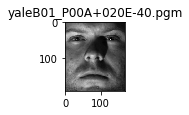

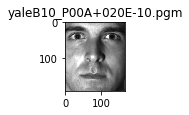

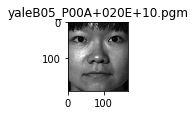

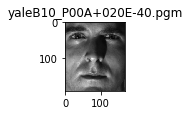

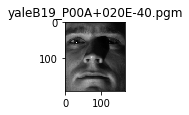

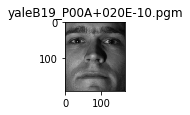

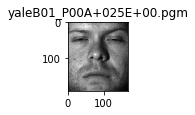

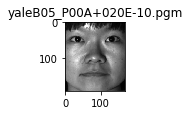

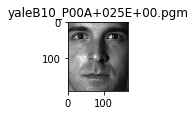

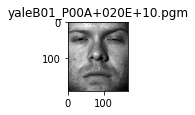

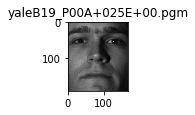

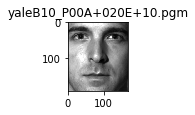

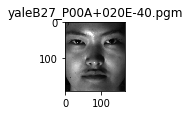

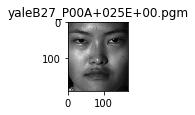

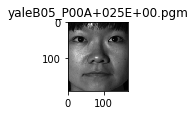

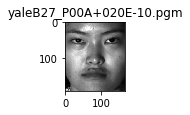

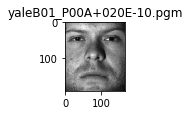

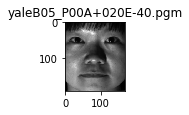

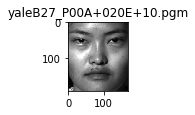

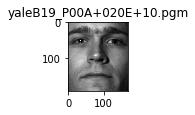

In [4]:
%matplotlib inline
import sys
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_images_from_directory(directory, suffix, shape):
    
    """
    Read all images found in DIRECTORY with given file
    name SUFFIX. All images should have the same SHAPE,
    specified as (rows,columns).
    
    Returns:
        images: A numpy array of shape m*rows*columns (from shape)
        names: A list of corresponding image names.
    """
    
    # initialize the image array and name list
    #images = np.empty((0, *shape))
    images = np.empty((0, ) + shape)
    names = []
    
    # now loop through all image files in the directory
    for file_name in glob.glob(directory + os.sep + '*.' + suffix):
        if os.path.isfile(file_name):
           
            # load each image (as double)
            img = plt.imread(file_name)

            # check for correct size
            if img.shape == shape:
                images = np.append(images, img.reshape((1, ) + shape), axis=0)
                names.append(os.path.basename(file_name))
            else:
                print(
                    'warning: Image "' + file_name +
                    '" with wrong size will be ignored!',
                    file=sys.stderr)

    return images, names


# image file suffix
suffix = 'pgm'

# image size
img_shape = (192, 168)

# YOUR CODE HERE

images, names = read_images_from_directory('images/trainimg', suffix, img_shape)
for number in range(len(images)):
    plt.figure(figsize=(24, 30))
    plt.subplot(len(images), 1, number+1); plt.title(names[number])
    plt.imshow(images[number], cmap='gray')
plt.show()

**b)** Use PCA to compute the eigenfaces (i.e. the eigenvectors of the face images). You may use your PCA function from Exercise 3 or some build in function. Explain what kind of input PCA expects, and how that fits to our images (you may have to `reshape` the images!). Finally, display the eigenfaces.

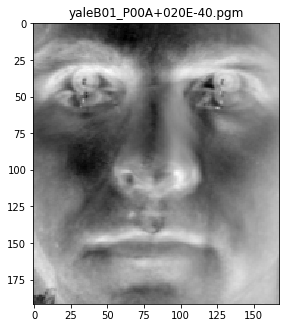

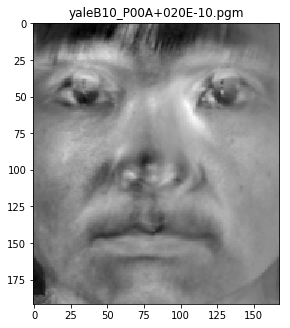

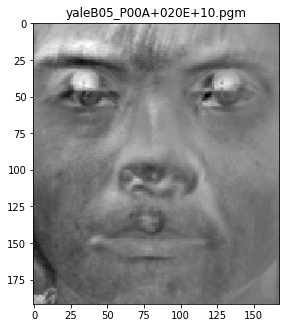

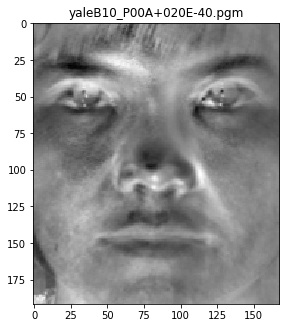

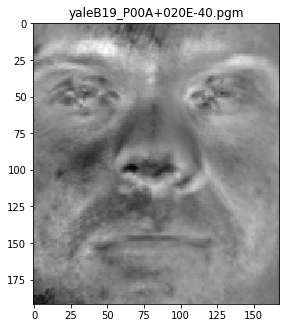

In [7]:
# YOUR CODE HERE
import cv2

faces = images.reshape((20, 192*168))
eigenval, eigenvectors = cv2.PCACompute(faces, mean=None, maxComponents=5)


for number in range(len(eigenvectors)):
    eigenface = eigenvectors[number].reshape((192,168))
    plt.figure(figsize=(24, 30))
    plt.subplot(len(eigenvectors), 1, number+1); plt.title(names[number])
    plt.imshow(eigenface, cmap='gray')
plt.show()

**c)** Now project the training face images into the eigenspace to calculate their ”feature vectors”,
i.e. a representation with significantly lower dimension. For the projection of the face images,
they have to be centered first, i.e. the mean face vector has to be subtracted. Store the mean face in some vector (`mean_face`) and the representation achieved in some array (`face_db`). Finally restore the images from `face_db` and display them alongside the original image. Try out the effect of changing the number of eigenfaces to be used (`num_eigenfaces`).

In [10]:
# number of eigenfaces to be used
num_eigenfaces = 10

mean_face = np.sum(images, axis=0)/images.shape[0]

face_db = []
for face in images:
    face_db.append(face-mean_face)

# idx = eigenval.argsort()[::-1]   
# eigenval = eigenval[idx]
# eigenvectors = eigenvectors[:,idx]
face_db = np.asarray(face_db).reshape(20, 192*168)
print(face_db.shape)

covariance = np.cov(face_db)

projections = eigenvectors.T.dot(covariance.T)
    
print(projections.shape)    

fig, ax = plt.subplots(len(face_db),2, figsize=(10,100))

for number in range(len(face_db)):
    ax[number,0].imshow(face_db[number],cmap='gray'), ax[number,0].set_title(names[number])
    ax[number,1].imshow(images[number],cmap='gray')


plt.show()

(20, 32256)


ValueError: shapes (32256,5) and (20,20) not aligned: 5 (dim 1) != 20 (dim 0)

**d)** Implement the function `recognize_face` that recognizes a face from that database by calculating the euclidean distance of this face feature vector to all of the training feature vectors from the database. The feature vector with the smallest distance represents the winner category. Check your implementation by recognizing the images from the training set (they should be recognized without error).

In [ ]:
from scipy.spatial.distance import cdist

def recognize_face(face, eigenfaces, mean_face, face_db):
    """
    Recognize a face from a face database.
    and return the index of the best matching database entry.

    The FACE is first centered and projected into the eigeface
    space provided by EIGENFACES. Then the best match is found
    according to the euclidean distance in the eigenface space.
    """
    index = -1

    # YOUR CODE HERE
    
    
    
    
    return index


# ... and now check your function on the training set ...
# YOUR CODE HERE

**e)** Now classify the images in directory `images/testimg/`. Try to reduce the number of principal components
used. How many PCs are necessary to still achieve perfect classification?

In [ ]:
test_imgs, test_names = read_images_from_directory('images/testimg', suffix,
                                                   img_shape)

# YOUR CODE HERE

[[1 2]
 [3 4]]
